# Data Camp Challenge Project : 

# Chicken meat authenticity 
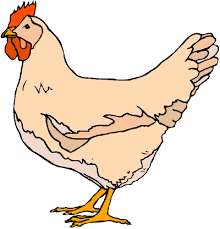

*Authors : Mathieu Petitbois, Léo Paillet, Paul Trillat*

## Table of content


1.   Introduction
  * The chicken meat problem
  * Dataset introduction
3.   Import
4.   Dataset exploratory analysis



## Introduction
### The chicken meat problem

The food industry must meet numerous standards in order to demonstrate a certain rigor in the composition of its products. It is essential to control the quality and composition of food. This is particularly true for chicken meat, whose quality can vary greatly and whose consumption can be dangerous if the production conditions are poor. However, the accumulation of controls can be costly and simplifications of methods are always welcome to gain in efficiency. A promising method used by the industry to analyze the composition of a portion of chicken is near infrared spectroscopy (NIR), which allows non-destructive and rapid detection of complex chemical compositions in the meat by measuring its absorbance at different wavelengths in the near infrared domain (from 780 nm to 2500 nm). However, these methods suffer from noise and the complexity of the results they offer make the use of machine learning methods necessary.

### Dataset introduction
The study dataset consists in NIV data of several fresh and thraweed chicken fillet samples. A total of 153 fresh fillet samples were provided by Albert Heijn B.V. from the Netherlands and Musgraves Group Ltd. from Ireland. For each of the samples provided by Albert Heijn B.V., animal welfare and production methods are expressed by a metric consisting in 4 categories:
* Conventional chicken (CONV) (18 samples)
* Free-range (1 star, 1*) (17 samples)
* Specialty (2 stars, 2*) (17 samples)
* Organic (ORG) (3 stars, 3*) (18 samples)

In a similar manner, Musgraves Group Ltd. provided the following categories :
* Standard chicken (STD) (18 samples)
* Free range (FR) (15 samples)
* Corn fed chicken (CF) (15 samples)
* Marinated chicken (MAR) (35 samples)
(Marinated chicken fillets act as controls, since they are expected to be highly identifiable).

Then 133 thawed samples were obtained from the fresh samples by freezing at − 18 °C for 48 h and thawing for 24 h at + 4 °C. These 153 samples were then subjected to NIR measurments through a transparent top foil in three different manners:

on meat (OM)
through package (TP)
through packaging bottom up (TB)
Same measurments were made without the transparent top foil. Thus, knowing that five replicates were taken per OM/TP/TB measurments, thus gives a total of:  $153\times 3 \times 2 \times 5 = 4590$  NIR measurments in wavelength range of approximately 908–1676 nm with an evenly distributed spectral resolution, resulting in 125 variables X908.1 to X1676.2

The dataset is consequently structured in the following way: Sample_number; Production_system (CONV/1 star/2 stars/ORG/STD/FR/CF/MAR); Scan_type (OM/TP/TD); Freshness (FR/TH); X908.1..X1676.2.

**The goal of this data challenge is to use the Production_system, Scan_type and NIR measurments to prediction if a sample is fresh or thrawed.**

## Imports

Here one can find useful imports 


## Data preprocessing

Let's delve into the data together to first preprocess it a bit to adapt it the the challenge. First, one may use the following snippet to import the data :

In [ ]:
import pandas as pd
data = pd.read_csv('Data-Parastar-et-al-2020-Food-Control.csv')
data.head(10)

,Sample_number,Production_system,Scan_type,Freshness,X908.1,X914.294,X920.489,X926.683,X932.877,X939.072,...,X1620.451,X1626.645,X1632.839,X1639.034,X1645.228,X1651.423,X1657.617,X1663.811,X1670.006,X1676.2
0,372740,CONV,OM,FR,0.948393,0.904984,0.874555,0.846286,0.821106,0.812392,...,1.516323,1.513983,1.512230,1.510318,1.508299,1.506486,1.505735,1.506011,1.505124,1.505922
1,372740,CONV,OM,FR,0.922095,0.873320,0.841661,0.810489,0.788310,0.778399,...,1.530172,1.527731,1.524960,1.522414,1.519425,1.516275,1.514267,1.514046,1.512464,1.511755
2,372740,CONV,OM,FR,0.930022,0.885096,0.851798,0.826088,0.801507,0.792855,...,1.530466,1.528996,1.526675,1.524635,1.522704,1.521194,1.519780,1.519208,1.517639,1.517983
3,372740,CONV,OM,FR,1.027240,0.978567,0.948365,0.919700,0.895121,0.886837,...,1.647675,1.645928,1.643908,1.642468,1.642556,1.643270,1.642282,1.643617,1.642481,1.643237
4,372740,CONV,OM,FR,0.961905,0.912591,0.884024,0.854717,0.830743,0.820935,...,1.502235,1.501345,1.499624,1.498545,1.496943,1.495152,1.494349,1.494737,1.493778,1.494781
5,372748,1 Star,OM,FR,0.866604,0.818614,0.792939,0.747124,0.722158,0.703620,...,1.468617,1.466741,1.463958,1.460146,1.461110,1.461979,1.458117,1.463802,1.472638,1.476745
6,372748,1 Star,OM,FR,0.855738,0.806328,0.776678,0.729926,0.701903,0.686617,...,1.549484,1.547102,1.543744,1.538547,1.538304,1.537674,1.531728,1.538606,1.547955,1.550721
7,372748,1 Star,OM,FR,0.965048,0.921317,0.903096,0.850690,0.824411,0.808559,...,1.490338,1.489412,1.487565,1.484160,1.484900,1.485471,1.481297,1.488775,1.497495,1.501975
8,372748,1 Star,OM,FR,0.993321,0.951792,0.933871,0.881007,0.854347,0.836862,...,1.504408,1.504311,1.502570,1.499195,1.501367,1.503595,1.499467,1.507043,1.517325,1.521372
9,372748,1 Star,OM,FR,0.855835,0.807683,0.782515,0.735455,0.706586,0.691833,...,1.448015,1.446086,1.444020,1.439569,1.439722,1.439694,1.436551,1.443846,1.452511,1.456303


We first want to get rid of useless information like the sample number as well as translating the string categories into real categories.

In [ ]:
# Dropping sample numbers
data.drop('Sample_number', axis=1, inplace=True)

# Turning column into categories
data.Production_system = pd.Categorical(data.Production_system)
data.Scan_type = pd.Categorical(data.Scan_type)
data.Freshness = pd.Categorical(data.Freshness)

# Print the category numbers
print(data['Production_system'].cat.categories.tolist())
print(data['Scan_type'].cat.categories.tolist())
print(data['Freshness'].cat.categories.tolist())

# Getting the category numbers
data['Production_system'] = data.Production_system.cat.codes
data['Scan_type'] = data.Scan_type.cat.codes
data['Freshness'] = data.Freshness.cat.codes

data.head()

['1 Star', '2 stars', 'CF', 'CONV', 'CONV ', 'FR', 'MAR', 'ORG', 'STD']
['OM', 'TB', 'TP']
['FR', 'TH']


,Production_system,Scan_type,Freshness,X908.1,X914.294,X920.489,X926.683,X932.877,X939.072,X945.266,...,X1620.451,X1626.645,X1632.839,X1639.034,X1645.228,X1651.423,X1657.617,X1663.811,X1670.006,X1676.2
0,3,0,0,0.948393,0.904984,0.874555,0.846286,0.821106,0.812392,0.815995,...,1.516323,1.513983,1.512230,1.510318,1.508299,1.506486,1.505735,1.506011,1.505124,1.505922
1,3,0,0,0.922095,0.873320,0.841661,0.810489,0.788310,0.778399,0.782089,...,1.530172,1.527731,1.524960,1.522414,1.519425,1.516275,1.514267,1.514046,1.512464,1.511755
2,3,0,0,0.930022,0.885096,0.851798,0.826088,0.801507,0.792855,0.797025,...,1.530466,1.528996,1.526675,1.524635,1.522704,1.521194,1.519780,1.519208,1.517639,1.517983
3,3,0,0,1.027240,0.978567,0.948365,0.919700,0.895121,0.886837,0.891372,...,1.647675,1.645928,1.643908,1.642468,1.642556,1.643270,1.642282,1.643617,1.642481,1.643237
4,3,0,0,0.961905,0.912591,0.884024,0.854717,0.830743,0.820935,0.825516,...,1.502235,1.501345,1.499624,1.498545,1.496943,1.495152,1.494349,1.494737,1.493778,1.494781


Then, we shuffle the data to consider each of the five chicken sample's measurements as independant.

In [ ]:
data.sample(frac=1)

,Production_system,Scan_type,Freshness,X908.1,X914.294,X920.489,X926.683,X932.877,X939.072,X945.266,...,X1620.451,X1626.645,X1632.839,X1639.034,X1645.228,X1651.423,X1657.617,X1663.811,X1670.006,X1676.2
1820,1,1,1,1.019590,0.984348,0.961623,0.937146,0.913947,0.903109,0.908310,...,1.313643,1.312277,1.311413,1.310386,1.309959,1.309852,1.310560,1.310611,1.311241,1.312305
3726,6,1,0,0.982982,0.952754,0.925977,0.901728,0.888240,0.879759,0.881276,...,1.349171,1.349343,1.349806,1.350950,1.350446,1.348945,1.347587,1.344906,1.341700,1.339556
117,0,2,0,1.039464,1.025350,1.037102,1.002921,0.988166,0.970869,1.004052,...,1.090965,1.091035,1.091028,1.090485,1.093417,1.096545,1.097472,1.101830,1.106745,1.109193
322,1,0,0,1.020730,0.972944,0.943668,0.912351,0.894332,0.881695,0.889364,...,1.567396,1.565784,1.564063,1.562055,1.561069,1.560391,1.559896,1.559705,1.561388,1.562603
2271,5,0,0,0.995149,0.959173,0.928003,0.897636,0.882282,0.873904,0.882025,...,1.544319,1.543183,1.542414,1.540852,1.540632,1.540890,1.539903,1.541039,1.541585,1.542094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,7,2,0,1.189106,1.172316,1.166002,1.153220,1.137824,1.135662,1.140889,...,1.250424,1.250781,1.250568,1.250801,1.250878,1.251262,1.251203,1.250919,1.251194,1.250448
741,7,0,0,1.008687,0.956556,0.918123,0.888636,0.861418,0.854692,0.857165,...,1.897700,1.893434,1.888752,1.885944,1.878447,1.872699,1.871686,1.866448,1.859375,1.855761
2960,6,2,0,0.976928,0.961523,0.946555,0.929115,0.921910,0.915540,0.925220,...,1.130248,1.128705,1.127140,1.126322,1.126872,1.128252,1.129642,1.131547,1.133417,1.134693
2689,2,2,0,1.002133,0.983531,0.972383,0.959850,0.951181,0.947551,0.951570,...,1.135051,1.134774,1.135592,1.137001,1.138651,1.140540,1.142076,1.142018,1.141415,1.139660


Finally, we want to divide the dataset into a training set (70%) and a test set (30%) and to discriminate the input features with the predicted output:

In [ ]:
# Ordering columns
cols = list(data.columns.values)
cols.remove('Freshness')
data = data[['Freshness']+cols]

# Division
X_train = data.iloc[:int(0.7*data.shape[0]),1:]
y_train = data.iloc[:int(0.7*data.shape[0]),0]

X_test = data.iloc[int(0.7*data.shape[0]):,1:]
y_test = data.iloc[int(0.7*data.shape[0]):,0]

## Exploratory analysis
### Spectra visualization
To start the exploratory analysis, one may want to print some spectra of different categories to see their potential impact:

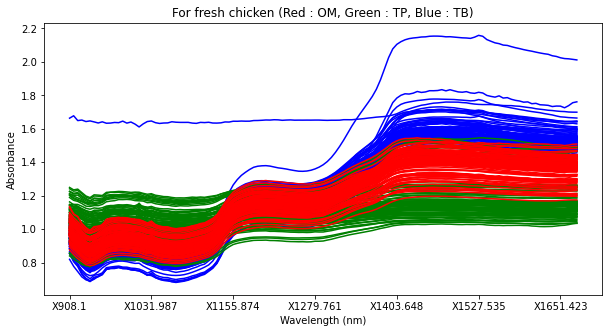

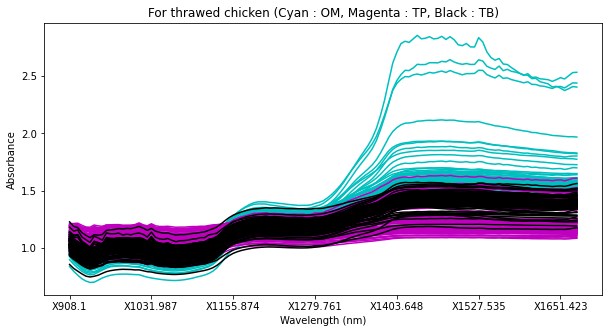

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# For fresh samples
ax = data[(data['Scan_type'] == 0) & (data['Freshness'] == 0)].iloc[:100,3:].T.plot.line(legend = False, color = 'b')
data[(data['Scan_type'] == 2) & (data['Freshness'] == 0)].iloc[:100,3:].T.plot.line(legend = False, color = 'g', ax = ax)
data[(data['Scan_type'] == 1) & (data['Freshness'] == 0)].iloc[:100,3:].T.plot.line(legend = False, color = 'r', ax = ax)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('For fresh chicken (Red : OM, Green : TP, Blue : TB)')
plt.show()

# For thrawed samples
ax = data[(data['Scan_type'] == 0) & (data['Freshness'] == 1)].iloc[:100,3:].T.plot.line(legend = False, color = 'c',)
data[(data['Scan_type'] == 2) & (data['Freshness'] == 1)].iloc[:100,3:].T.plot.line(legend = False, color = 'm',ax = ax)
data[(data['Scan_type'] == 1) & (data['Freshness'] == 1)].iloc[:100,3:].T.plot.line(legend = False, color = 'k',ax = ax)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('For thrawed chicken (Cyan : OM, Magenta : TP, Black : TB)')
plt.show()

We see here that method of scanning has a big impact on the shape of the spectrum no matter the freshness of the sample. In order to see if the freshness has an influence on the shape of the spectra, one can plot the following graphs :

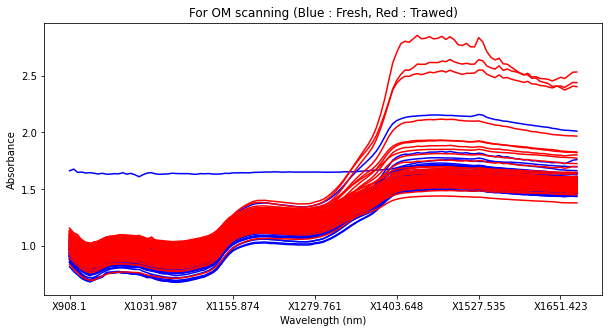

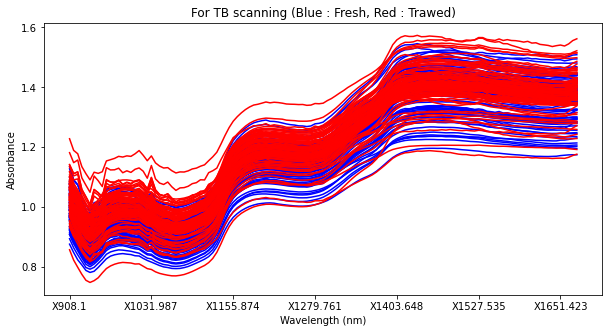

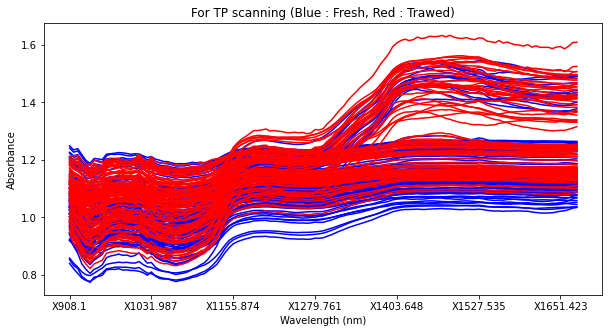

In [ ]:
# For OM scanning
ax = data[(data['Scan_type'] == 0) & (data['Freshness'] == 0)].iloc[:100,3:].T.plot.line(legend = False, color = 'b')
data[(data['Scan_type'] == 0) & (data['Freshness'] == 1)].iloc[:100,3:].T.plot.line(legend = False, color = 'r', ax = ax)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('For OM scanning (Blue : Fresh, Red : Trawed)')
plt.show()

# For TB scanning
ax = data[(data['Scan_type'] == 1) & (data['Freshness'] == 0)].iloc[:100,3:].T.plot.line(legend = False, color = 'b', label = 'OM')
data[(data['Scan_type'] == 1) & (data['Freshness'] == 1)].iloc[:100,3:].T.plot.line(legend = False, color = 'r', label = 'TP', ax = ax)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('For TB scanning (Blue : Fresh, Red : Trawed)')
plt.show()

# For TP scanning
ax = data[(data['Scan_type'] == 2) & (data['Freshness'] == 0)].iloc[:100,3:].T.plot.line(legend = False, color = 'b', label = 'OM')
data[(data['Scan_type'] == 2) & (data['Freshness'] == 1)].iloc[:100,3:].T.plot.line(legend = False, color = 'r', label = 'TP', ax = ax)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('For TP scanning (Blue : Fresh, Red : Trawed)')
plt.show()


We can see that no matter the scanning method, thrawed samples distribution has highier absorbance then the one of fresh samples. However, the shape remain visually the same and furthermore most of their support are joint. Thus, it seems visualy impossible to distinguish the freshness visually, which justify the need of machine learning.

### Normalization

To better analyse our data, we propose to perfom a PCA. For this purpose, we need to normalize it with the following snippet:


In [ ]:
X_train.iloc[:,2:]=(X_train.iloc[:,2:]-X_train.iloc[:,2:].mean())/X_train.iloc[:,2:].std()
X_test.iloc[:,2:]=(X_test.iloc[:,2:]-X_test.iloc[:,2:].mean())/X_test.iloc[:,2:].std()
print(sum(X_train.iloc[:,3]))

1.074940136902569e-11


We can then perform an PCA on X_train using the sklearn library (X_test is very likely to give similar results):

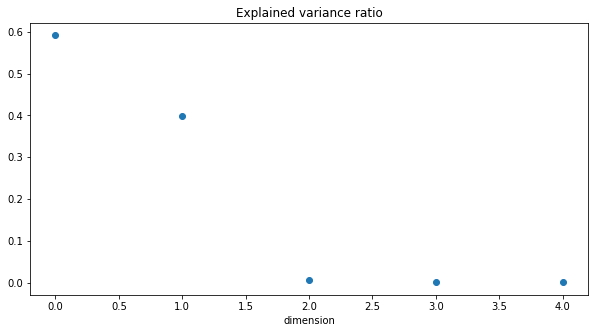

[5.91693486e-01 3.98469199e-01 7.35934623e-03 1.00432082e-03
 5.01036379e-04]
125


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X_train.iloc[:,2:])

exp_variances = pca.explained_variance_ratio_
plt.figure()
plt.title('Explained variance ratio')
plt.plot(exp_variances[:5],'o')
plt.xlabel('dimension')
plt.show()

print(exp_variances[:5])
print(len(exp_variances))

We see that the first two axes are cumulating more than 99 % of the total inertia (or explained variance) of the data cloud. Thus, if there are 125 corresponding eigenvalues (thus axis with which the cloud could be regenated), only a few of them are necessary to capture the bulk of the information. This is likely coming from the similarity of the spectra's shapes. Thus, let's show if the freshness impacts the projections on the 2 first principal plans:

<Figure size 720x360 with 0 Axes>

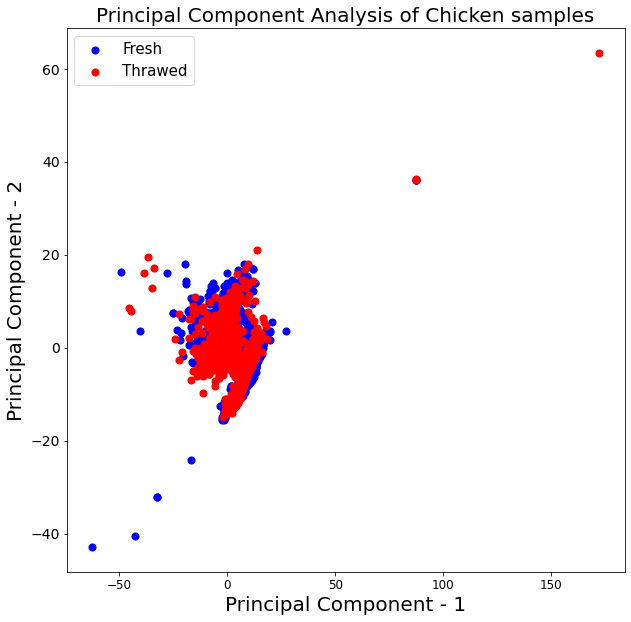

<Figure size 720x360 with 0 Axes>

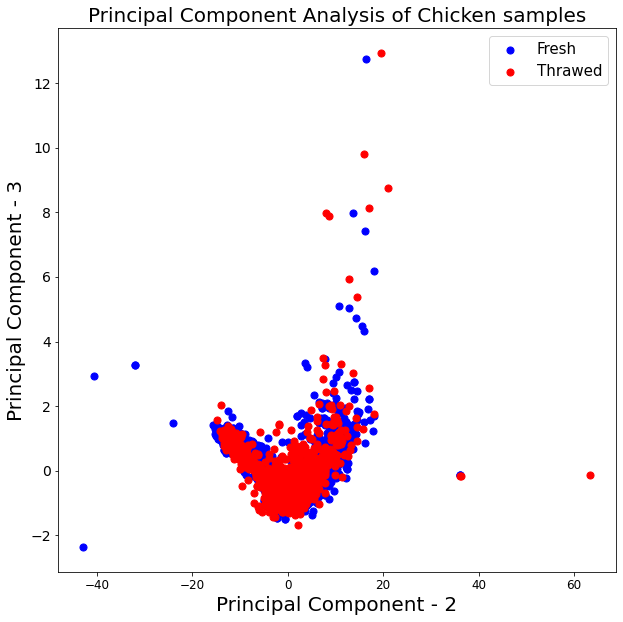

In [ ]:
dimension = 3
X_train_pca = pd.DataFrame(pca.transform(X_train.iloc[:,2:])[:,0:dimension],columns = ['principal component 1', 'principal component 2','principal component 3'])

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Chicken samples",fontsize=20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
  indicesToKeep = y_train == target
  plt.scatter(X_train_pca.loc[indicesToKeep, 'principal component 1']
              , X_train_pca.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.legend(['Fresh','Thrawed'],prop={'size': 15})

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 2',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Principal Component Analysis of Chicken samples",fontsize=20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
  indicesToKeep = y_train == target
  plt.scatter(X_train_pca.loc[indicesToKeep, 'principal component 2']
              , X_train_pca.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
plt.legend(['Fresh','Thrawed'],prop={'size': 15})

We see again that the distributions seem really similar between the two categories (moreover, some outliers from both categories seem to impact the computing of the princpal axes). Thus, there doesn't seem to be linear combination of variables that discriminate the two categories.